In [1]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, pandas as pd
plt.style.use('seaborn-v0_8-whitegrid')
# plt.style.available

## `plt.scatter()` or `plt.plot()`

# Error Visualization

For any scintific experiment/measurment, accurate documentation of the error is as important, if not more important, than the documentation of the data being recorded itself. The visualization of this error makes it easier to keep track of the data being studied.

## Basic Errorbars

Basic Errorbars can be created as flollows

<ErrorbarContainer object of 3 artists>

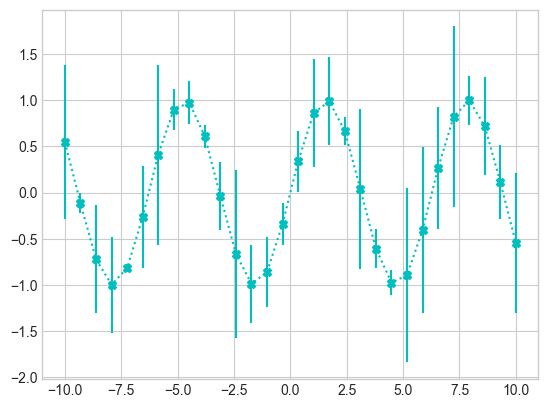

In [2]:
x=np.linspace(-10,10,30)
y=np.sin(x)
plt.errorbar(x,y,yerr=np.random.random(30),fmt=':Xc')# fmt argument takes in the specifics of the visual elements of the points being displayed.

In addition to this basic styles, the errorbar can be customized in further ways as follows

<ErrorbarContainer object of 3 artists>

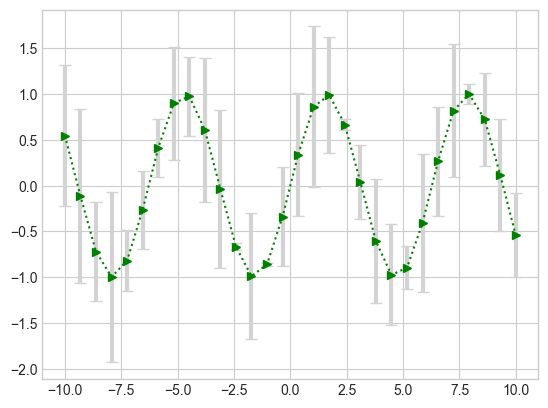

In [3]:
plt.errorbar(
    x,
    y,
    fmt=':>g',
    yerr=np.random.rand(30),
    ecolor='lightgray',
    elinewidth=3,
    capsize=4,
    capthick=1,
    markersize=6,
)

We can also set the error bar in x direction using `xerr` argument. More of such interesting arguments can be discovered via the docstring of the function.

## Continuous Errors

In some situations its desirable to find a continuous error window for a mean plot we're trying to study. 

Although this is not possible directly on Matplotlib, there are ways of doing this using Gausean process regression and tools loke `plt.plot()` and plt.`fill_between()`.

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)

# Lambda functions are temporary functions that are usually used to define throwaway functions that can be used instantaneously and forgotten
# They are mostly used as :
# lambda arguments:temporary_throwaway_expression(arguments)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata) # 'model' being the temporary function `model(xdata)` gives the output of the temporary function for each value in xdata


# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:,np.newaxis], ydata)

xfit = np.linspace(0, 10, 100)#Generates the x values
yfit,dyfit=gp.predict(xfit[:, np.newaxis], return_std=True)# generates the mean y values corresponding to each x value(yfit) and a non-negative error measure corresponding to each x value(dyfit)


(0.0, 10.0)

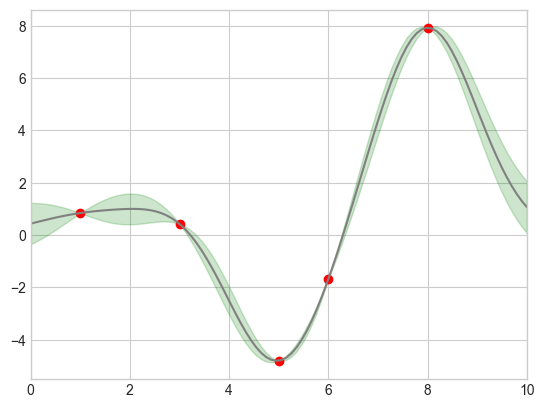

In [5]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(
    x=xfit,
    y1=yfit - dyfit, 
    y2=yfit + dyfit,
    color='green',
    alpha=0.2,
)
plt.xlim(0, 10)